In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd

In [3]:



tau_lst = [0,0.125,0.25,0.375,0.5,0.75,1,1.5,1.25,1.75]

T_lst=[50,100,500]

In [4]:
p1lst = []
p2lst = []
for a in range(len(tau_lst)):
    if(a!=0):
        for b in range(len(T_lst)):
            tau = tau_lst[a]
            T =T_lst[b]# sample size
          #  b=2
            if((tau!=0.125)&(tau!=0.375)):
                p1now = np.load('spd_3_pval_debias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
                p2now=np.load('spd_3_pval_bias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
                p1lst.append((tau,np.rint(T) , np.mean(p1now<=0.05) ))
                p2lst.append((tau,np.rint(T) , np.mean(p2now<=0.05)))


In [5]:
p1lst

[(0.25, 50.0, 0.0528),
 (0.25, 100.0, 0.0546),
 (0.25, 500.0, 0.077),
 (0.5, 50.0, 0.0878),
 (0.5, 100.0, 0.091),
 (0.5, 500.0, 0.3048),
 (0.75, 50.0, 0.1962),
 (0.75, 100.0, 0.1772),
 (0.75, 500.0, 0.9254),
 (1, 50.0, 0.4302),
 (1, 100.0, 0.3586),
 (1, 500.0, 0.9998),
 (1.5, 50.0, 0.9152),
 (1.5, 100.0, 0.971),
 (1.5, 500.0, 1.0),
 (1.25, 50.0, 0.7376),
 (1.25, 100.0, 0.8946),
 (1.25, 500.0, 1.0),
 (1.75, 50.0, 0.9634),
 (1.75, 100.0, 0.976),
 (1.75, 500.0, 0.996)]

In [9]:
p1lst.append((0,np.rint(50),0.0384))
p1lst.append((0,np.rint(100),0.0404))
p1lst.append((0,np.rint(500),0.0478))
p2lst.append((0,np.rint(50),0.0082))
p2lst.append((0,np.rint(100),0.0086))
p2lst.append((0,np.rint(500),0.0098))

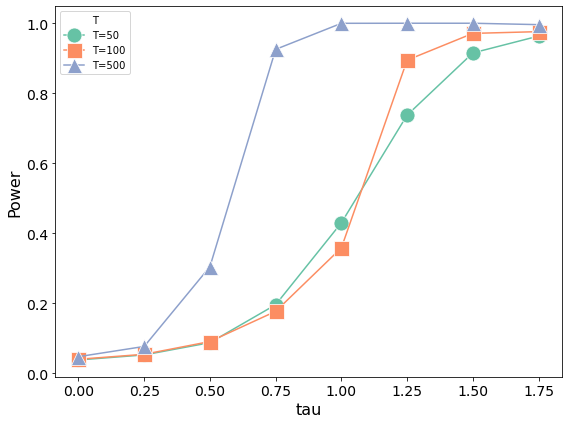

In [16]:

# Assuming p1lst is defined and contains your data
p1_array = np.array(p1lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p1_df = pd.DataFrame(p1_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p1_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in SPD matrices', fontsize=15)

plt.legend(title='T')
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()


plt.savefig('Power_spd.png',facecolor='w')

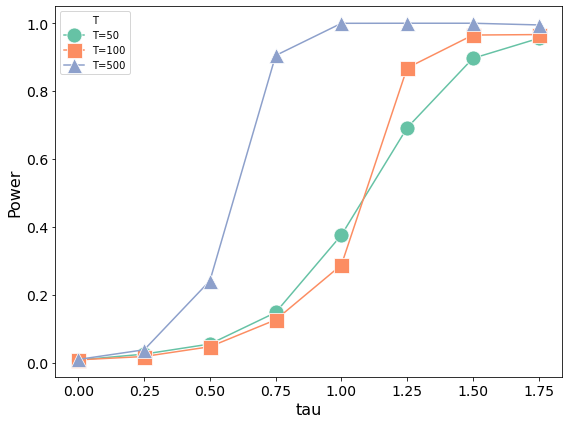

In [15]:

# Assuming p1lst is defined and contains your data
p2_array = np.array(p2lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p2_df = pd.DataFrame(p2_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p2_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in SPD matrices', fontsize=15)

plt.legend(title='T')
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()


plt.savefig('Power_spd_B1.png',facecolor='w')

In [14]:
p2_df['tau']

0     0.25
1     0.25
2     0.25
3     0.50
4     0.50
5     0.50
6     0.75
7     0.75
8     0.75
9     1.00
10    1.00
11    1.00
12    1.50
13    1.50
14    1.50
15    1.25
16    1.25
17    1.25
18    1.75
19    1.75
20    1.75
21    0.00
22    0.00
23    0.00
24    0.00
25    0.00
26    0.00
Name: tau, dtype: float32

In [11]:
p2_array

array([(0.25,  50., 0.0254), (0.25, 100., 0.0184), (0.25, 500., 0.0382),
       (0.5 ,  50., 0.0552), (0.5 , 100., 0.0472), (0.5 , 500., 0.2416),
       (0.75,  50., 0.148 ), (0.75, 100., 0.1264), (0.75, 500., 0.905 ),
       (1.  ,  50., 0.376 ), (1.  , 100., 0.288 ), (1.  , 500., 0.9998),
       (1.5 ,  50., 0.8966), (1.5 , 100., 0.9652), (1.5 , 500., 1.    ),
       (1.25,  50., 0.692 ), (1.25, 100., 0.8682), (1.25, 500., 1.    ),
       (1.75,  50., 0.9554), (1.75, 100., 0.9666), (1.75, 500., 0.995 ),
       (0.  ,  50., 0.0082), (0.  , 100., 0.0086), (0.  , 500., 0.0098),
       (0.  ,  50., 0.0082), (0.  , 100., 0.0086), (0.  , 500., 0.0098)],
      dtype=[('tau', '<f4'), ('T', '<f4'), ('p', '<f4')])

In [12]:
p1_array

array([(0.25,  50., 0.0528), (0.25, 100., 0.0546), (0.25, 500., 0.077 ),
       (0.5 ,  50., 0.0878), (0.5 , 100., 0.091 ), (0.5 , 500., 0.3048),
       (0.75,  50., 0.1962), (0.75, 100., 0.1772), (0.75, 500., 0.9254),
       (1.  ,  50., 0.4302), (1.  , 100., 0.3586), (1.  , 500., 0.9998),
       (1.5 ,  50., 0.9152), (1.5 , 100., 0.971 ), (1.5 , 500., 1.    ),
       (1.25,  50., 0.7376), (1.25, 100., 0.8946), (1.25, 500., 1.    ),
       (1.75,  50., 0.9634), (1.75, 100., 0.976 ), (1.75, 500., 0.996 )],
      dtype=[('tau', '<f4'), ('T', '<f4'), ('p', '<f4')])

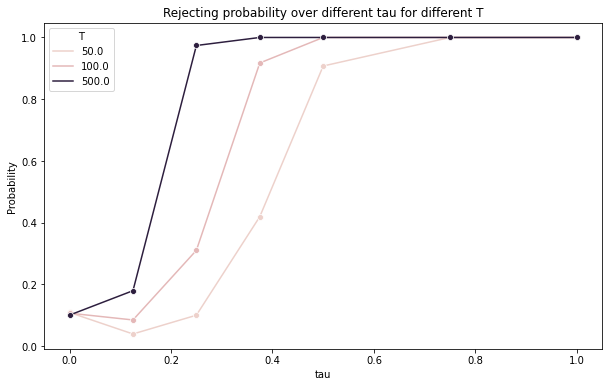

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=p2_df, x='tau', y='p', hue='T', marker='o')
plt.title('Rejecting probability over different tau for different T')
plt.xlabel('tau')
plt.ylabel('Probability')
plt.legend(title='T')
plt.show()

In [21]:
p1spd=np.load('/Users/junhaozhu/Code/Manifold_TS/Dec_15_SPD=3_power/pval_bias_tau_0_T_0.npy')
p2spd=np.load('/Users/junhaozhu/Code/Manifold_TS/Dec_15_SPD=3_power/pval_debias_tau_0_T_0.npy')

In [4]:
p1lst = []
p2lst = []
for a in range(len(tau_lst)):
    if(a!=0):
        for b in range(len(T_lst)):
            tau = tau_lst[a]
            T =T_lst[b]# sample size
          #  b=2
            if((tau!=0.125)&(tau!=0.375)):
                p1now = np.load('spd_3_pval_debias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
                p2now=np.load('spd_3_pval_bias' +'_tau_'+str(a)+'_T_'+str(b)+'.npy')
                p1lst.append((tau,np.rint(T) , np.mean(p1now<=0.05) ))
                p2lst.append((tau,np.rint(T) , np.mean(p2now<=0.05)))


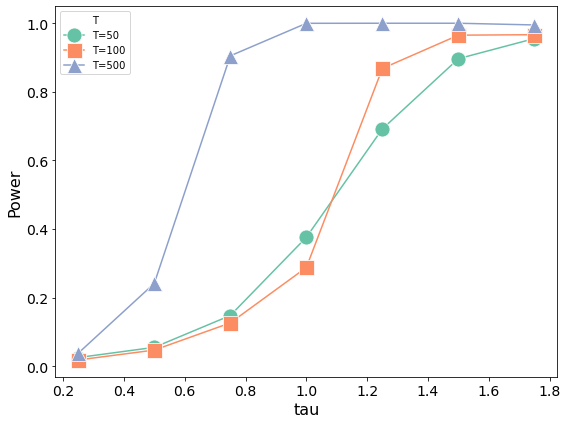

In [6]:
p2_array = np.array(p2lst, dtype=[('tau', 'f4'), ('T', 'f4'), ('p', 'f4')])
p2_df = pd.DataFrame(p2_array)

# Define a color palette and markers
palette = sns.color_palette("Set2")  # You can choose other palettes
markers = ["o", "s", "^", "D", "x", "*", "P"]  # Different marker styles

# Plot using seaborn
plt.figure(figsize=(8, 6))
for i, (T, grp) in enumerate(p2_df.groupby('T')):
    sns.lineplot(data=grp, x='tau', y='p', label=f'T={int(T)}',
                 color=palette[i % len(palette)], marker=markers[i % len(markers)],markersize=15)

#plt.title('Power curves for first order stationarity test in SPD matrices', fontsize=15)

plt.legend(title='T')
plt.xlabel('tau',size=16)
plt.ylabel('Power',size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

In [9]:
p2lst

[(0.25, 50.0, 0.0254),
 (0.25, 100.0, 0.0184),
 (0.25, 500.0, 0.0382),
 (0.5, 50.0, 0.0552),
 (0.5, 100.0, 0.0472),
 (0.5, 500.0, 0.2416),
 (0.75, 50.0, 0.148),
 (0.75, 100.0, 0.1264),
 (0.75, 500.0, 0.905),
 (1, 50.0, 0.376),
 (1, 100.0, 0.288),
 (1, 500.0, 0.9998),
 (1.5, 50.0, 0.8966),
 (1.5, 100.0, 0.9652),
 (1.5, 500.0, 1.0),
 (1.25, 50.0, 0.692),
 (1.25, 100.0, 0.8682),
 (1.25, 500.0, 1.0),
 (1.75, 50.0, 0.9554),
 (1.75, 100.0, 0.9666),
 (1.75, 500.0, 0.995)]

In [11]:
len(p1lst)

21